# Feed-Forward Neural Network from scratch with NumPy

<a href="https://colab.research.google.com/drive/10ve3pt_04COK0RFYDfITPhXjN0BC9MDs" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab">
</a>

Return to the [castle](https://github.com/Nkluge-correa/TeenyTinyCastle).

The [MNIST database](http://yann.lecun.com/exdb/mnist/) is a large collection of handwritten digits commonly used as a benchmark dataset for image recognition tasks in machine learning. It consists of 70,000 grayscale images of handwritten digits from zero to nine, each of which is 28 pixels wide and 28 pixels high.

This dataset is widely used as it is relatively easy to work with and is large enough to provide a representative sample of the kinds of images a model might encounter in the real world.

![MNIST sample images](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png)

[Source](https://en.wikipedia.org/wiki/MNIST_database#).

In this notebook, we will be implementing a `neural network` from _scratch_, to tackle the multi-classification problem posed by the MNIST digit dataset. But first, let us download the MNIST dataset from the Hub. 🤗

> The `train`split comes with 60,000 samples, and the `test` split comes with 10,000.

To download this dataset, we need to first install the `datasets` library.


In [1]:
# the `-q` (quiet) key makes the installation less "verbose"
%pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 9.5 MB/s eta 0:00:00


In [8]:
from datasets import load_dataset

# load the dataset from the hub
dataset = load_dataset("AiresPucrs/MNIST-digit")

# turn the dataset into a pandas.DataFrame
train = dataset['train'].to_pandas()
test = dataset['test'].to_pandas()

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Now, let us see a quick overview of the MNIST training and test datasets by displaying each dataset's first few rows and labels.

In [10]:
print ("MNIST train dataset")
display(train.head())

print ("MNIST test dataset")
display(test.head())

MNIST train dataset


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


MNIST test dataset


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Below, we visually represent the image's pixel values to understand what the handwritten digit looks like.

In [11]:
import pandas as pd
import numpy as np

for i in train.drop('label', axis=1).iloc[0].values.reshape((28, 28)):
    for j in i:
        print(round(j, 2), end=" ")
    print()


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 
0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 
0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 
0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0 


These big pixel numbers are not `neural-network` friendly. Normalizing these values (putting all feature points in a range between 0 and 1) can help improve the convergence rate while training the algorithm by ensuring that the input features have a similar scale and variance.

Normalization can also help improve the model's generalization performance by reducing the network's sensitivity to small changes in the input data.

> Note: If our model is in production, this preprocessing step has to be done before passing an input through our model, if the model was trained on normalized data instead of raw inputs.

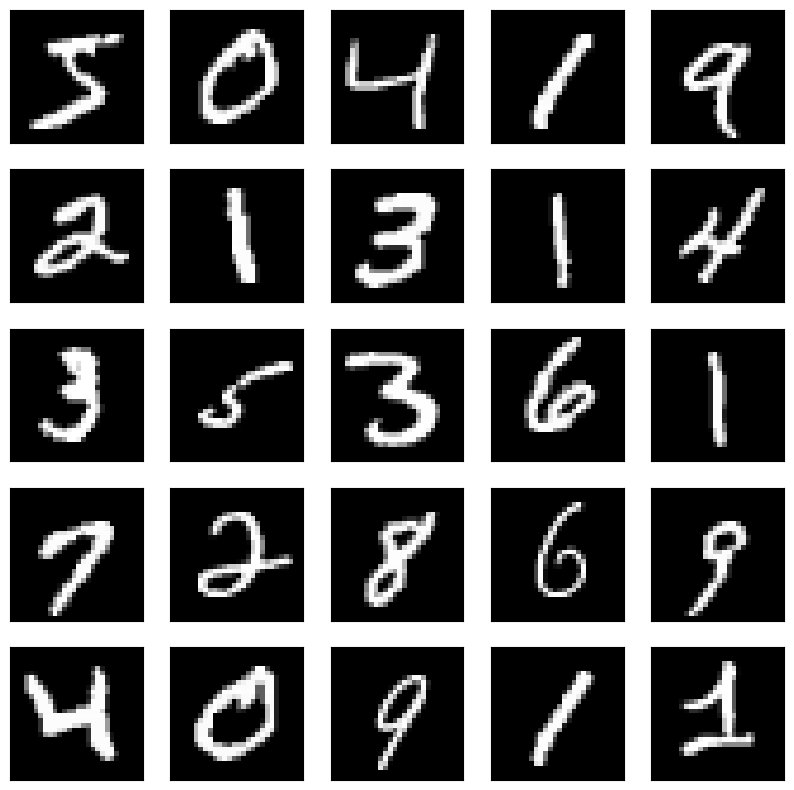

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x_train, y_train = np.array(
    train[train.columns.to_list()[1:]]).T, np.array(train['label'])

x_test, y_test = np.array(
    test[test.columns.to_list()[1:]]).T, np.array(test['label'])

# Data normalization
x_train = x_train / 255.
x_test = x_test / 255.

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.gray()
    plt.imshow(x_train[:, i, None].reshape(
        (28, 28)) * 255, interpolation='nearest')

plt.show()

We will now implement a neural network with one hidden layer, using only `Numpy`. Our input layer will have 784 units (784 pixels = 2D image 28x28).

Our hidden and output layers will have ten units each. All initial parameters will be randomly set between -0.5 and 0.5. In total, we will have the following number of parameters ($\theta$):

$$\theta = weights ((10 \times 784) + (10 \times 10) = 7940) + biases (10 + 10 = 20) = 7960$$


In [13]:
def init_parameters():
    """
    Initialize the parameters of a two-layer neural network for image classification.

    Returns:
    - W1 (np.ndarray): weight matrix of shape (10, 784) for the first layer.
    - b1 (np.ndarray): bias vector of shape (10, 1) for the first layer.
    - W2 (np.ndarray): weight matrix of shape (10, 10) for the second layer.
    - b2 (np.ndarray): bias vector of shape (10, 1) for the second layer.

    The weight matrices are randomly initialized with values in the range [-0.5, 0.5],
    and the bias vectors are initialized with values in the same range. These initial
    values can be adjusted for different applications as needed.
    """
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

We will use ReLU (Rectified Linear Unit) as an activation function. ReLU can be understood by this simple conditional statement:

```python

if x > 0:
   x = x
else:
   x = 0

```


In [14]:
def ReLU(Z):
    """
    Applies the rectified linear unit (ReLU) activation function
    element-wise to a given input.

    Args:
    - Z (np.ndarray): input array of any shape.

    Returns:
    - A (np.ndarray): output array of the same shape as Z, with ReLU applied element-wise.

    The ReLU function returns the element-wise maximum between 0 and the input array Z.
    This has the effect of setting all negative values in Z to 0 and leaving all non-negative
    values unchanged. The resulting array A has the same shape as Z.
    """
    return np.maximum(Z, 0)

The softmax function is a commonly used activation function in machine learning for multi-class classification problems. It takes a vector of arbitrary real-valued scores (logits) and maps them to a probability distribution over the classes, making it easier to interpret and compare the results.

$$Pr(x_{0}) =  \frac{e^{x_{0}}}{e^{x_{0}} + e^{x_{1}} + e^{x_{2}} ... + e^{x_{n}}}$$


In [17]:
def softmax(Z):
    """
    Applies the softmax activation function element-wise to a given input.

    Args:
    - Z (np.ndarray): input array of shape (n,) or (m, n), where n is the number of classes.

    Returns:
    - A (np.ndarray): output array of the same shape as Z, with softmax applied element-wise.

    The softmax function applies the exponential function to each element of the input array Z,
    and then normalizes the resulting array by dividing by the sum of the exponentials. This has
    the effect of converting the input array into a probability distribution over the classes,
    with each element representing the probability of the corresponding class. The resulting
    array A has the same shape as Z.
    """
    softmax = np.exp(Z) / sum(np.exp(Z))
    return softmax

This network has 3 layers: input ($a_{0}$), hidden ($a_{1}$), and output ($a_{2}$):

- $w_{1}$ is the parameters between $a_{0}$ and $a_{1}$.
- $b_{1}$ is the bias of $w_{1}$.
- $w_{2}$ is the parameters between $a_{1}$ and $a_{2}$.
- $b_{2}$ is the bias of $w_{2}$ (parameters are associated with connections, bias to nodes).
- $z_{1}$ is the scalar product of the input signal $a_{0}$ (784 = 28x28) with $w_{1} + b_{1}$:

$$w_{1} \cdot x_{1} + w_{2} \cdot x_{2} ... w_{784} \cdot x_{784} + b_{1}$$

- the final output of $a_{1}$ is $\text{ReLU}(z_{1})$.
- $z_{2}$ = the scalar product of $\text{ReLU}(z_{1})$ with $w_{2}$ + $b_{2}$.
- the final output of $a_{2}$ is $\text{softmax}(z_{2})$.

This is the forward pass of our network.


In [16]:
def forward_propagation(W1, b1, W2, b2, X):
    """
    Implements forward propagation for a two-layer neural network.

    Args:
    - W1 (np.ndarray): weight matrix of shape
        (hidden_units, input_units) for the first layer.
    - b1 (np.ndarray): bias vector of shape
        (hidden_units, 1) for the first layer.
    - W2 (np.ndarray): weight matrix of shape
        (output_units, hidden_units) for the second layer.
    - b2 (np.ndarray): bias vector of shape
        (output_units, 1) for the second layer.
    - X (np.ndarray): input array of shape
        (input_units, m), where m is the number of examples.

    Returns:
    - Z1 (np.ndarray): linear transformation of input array
        by the first weight matrix plus the first bias vector,
        of shape (hidden_units, m).
    - A1 (np.ndarray): activation of the first layer obtained
        by applying ReLU element-wise to Z1, of shape
        (hidden_units, m).
    - Z2 (np.ndarray): linear transformation of the first layer
        activation by the second weight matrix plus the second
        bias vector, of shape (output_units, m).
    - A2 (np.ndarray): output of the neural network obtained by
        applying softmax element-wise to Z2, of shape
        (output_units, m).
    """

    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


Given this output, we will compare it with the ground truth. Labels will be `one_hot_encoded` in this implementation. One hot encoding means transforming categorical labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] into sparse binary vectors:

```python

- '0' = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
- '1' = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
- '2' = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
.
.
.
- '9' = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [15]:
def one_hot_encoding(Y):
    """
    Performs one-hot encoding on an array of labels.

    Args:
    - Y (np.ndarray): input array of shape (m,)
        containing integer labels.

    Returns:
    - one_hot_Y (np.ndarray): output array of shape (n, m)
        containing one-hot encodings of the input labels,
        where n is the number of unique labels in Y.
    """
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

For the backward pass, we will need to "undo" the ReLU, and for this, we need the derivative of the ReLU function, which (luckily) is extremely simple:

```python

if x > 0:
   x = 1
else:
   x = 0

```


In [18]:
def ReLU_derivative(Z):
    """
    Computes the derivative of the Rectified
    Linear Unit (ReLU) activation function.

    Args:
    - Z (np.ndarray): input array of shape (n, m), where n
        is the number of neurons and m is the number of examples.

    Returns:
    - dA (np.ndarray): output array of shape (n, m)
        containing the derivatives of the ReLU activation function
        at the input Z.

    The derivative of the ReLU function is defined as follows:

        - if Z > 0, dA/dZ = 1
        - if Z <= 0, dA/dZ = 0
    """
    return Z > 0

With all these pieces, we can build our backward propagation:

- $dz_{2}$ = (what was predicted, $a_{2}$) $-$ (the correct category).
- $dw_{2}$ = $\frac{1}{60000} \times (dz_{2} \cdot a_{1})$.
- $db_{2}$ = $\frac{1}{60000} \times \sum_{i=1}^n dz_{2}$.
- $dz_{1}$ = $w_{2} \cdot dz_{2} \times d_\text{ReLU}(z_{1})$.
- $dw_{1}$ = $\frac{1}{60000} \times (dz_{1} \cdot x)$.
- $db_{1}$ = $\frac{1}{60000} \times \sum_{i=1}^n dz_{1}$.


In [23]:
def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    """
    Computes the gradients of the weights and biases of a
    two-layer neural network using backpropagation.

    Args:
        - Z1 (np.ndarray): input array of shape (n1, m).
        - A1 (np.ndarray): output array of shape (n1, m).
        - Z2 (np.ndarray): input array of shape (n2, m).
        - A2 (np.ndarray): output array of shape (n2, m).
        - W1 (np.ndarray): weight matrix of shape (n1, input_dim).
        - W2 (np.ndarray): weight matrix of shape (n2, n1).
        - X (np.ndarray): input array of shape (input_dim, m).
        - Y (np.ndarray): target array of shape (m,)
            containing the true labels of the examples.

    Returns:
        - dW1 (np.ndarray): gradient of the weight matrix W1 with respect to the loss function.
        - db1 (np.ndarray): gradient of the bias vector b1 with respect to the loss function.
        - dW2 (np.ndarray): gradient of the weight matrix W2 with respect to the loss function.
        - db2 (np.ndarray): gradient of the bias vector b2 with respect to the loss function.
    """
    one_hot_Y = one_hot_encoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / x_train.shape[1] * dZ2.dot(A1.T)
    db2 = 1 / x_train.shape[1] * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1 = 1 / x_train.shape[1] * dZ1.dot(X.T)
    db1 = 1 / x_train.shape[1] * np.sum(dZ1)
    return dW1, db1, dW2, db2


After the backward pass, we need to update our parameters. And we do this update in relation to a learning rate, which is the optimizer's step size ("_how much we will change the current parameter per update_").

- $w_{\text{new 1}} = w_{\text{old 1}} - (\alpha \times dw_{1})$.
- $b_{\text{new 1}} = b_{\text{old 1}} - (\alpha \times db_{1})$.
- $w_{\text{new 2}} = w_{\text{old 2}} - (\alpha \times dw_{2})$.
- $b_{\text{new 2}} = b_{\text{old 2}} - (\alpha \times db_{2})$.



In [24]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    """
    Update the weights and biases of the neural network based on
    the calculated gradients and learning rate.

    Parameters:
        W1 (numpy array): weights of the first layer (10 x 784).
        b1 (numpy array): biases of the first layer (10 x 1).
        W2 (numpy array): weights of the second layer (10 x 10).
        b2 (numpy array): biases of the second layer (10 x 1).
        dW1 (numpy array): gradients of the weights of the first layer (10 x 784).
        db1 (numpy array): gradients of the biases of the first layer (10 x 1).
        dW2 (numpy array): gradients of the weights of the second layer (10 x 10).
        db2 (numpy array): gradients of the biases of the second layer (10 x 1).
        alpha (float): learning rate for updating the parameters.

    Returns:
        W1 (numpy array): updated weights of the first layer (10 x 784).
        b1 (numpy array): updated biases of the first layer (10 x 1).
        W2 (numpy array): updated weights of the second layer (10 x 10).
        b2 (numpy array): updated biases of the second layer (10 x 1).
    """
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


Let us now create functions to give us predictions and an accuracy score.


In [25]:
def get_predictions(A2):
    """
    Get the predicted class for each input in the batch,
    based on the output probabilities of the last layer.

    Parameters:
        - A2 (numpy array): output probabilities of the last
        layer (10 x number of examples).

    Returns:
        - predictions (numpy array): predicted class for
        each input in the batch (1 x number of examples).
    """
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

Tying all together, we have a training function via `gradient descent`!


In [26]:
W1_history = []
b1_history = []
W2_history = []
b2_history = []

def gradient_descent(X, Y, alpha, iterations):

    """
    Train a neural network using gradient descent
    and return the learned parameters.

    Parameters:
        - X (numpy array): input data matrix of shape
        (number of features x number of examples).
        - Y (numpy array): true labels matrix of shape (1 x number of examples).
        - alpha (float): learning rate.
        - iterations (int): number of iterations of gradient descent to run.

    Returns:
        - W1 (numpy array): learned weight matrix of the first layer.
        - b1 (numpy array): learned bias matrix of the first layer.
        - W2 (numpy array): learned weight matrix of the second layer.
        - b2 (numpy array): learned bias matrix of the second layer.
    """

    W1, b1, W2, b2 = init_parameters()

    for i in range(iterations):

        W1_history.append(W1)
        b1_history.append(b1)
        W2_history.append(W2)
        b2_history.append(b2)

        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)

        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)

        W1, b1, W2, b2 = update_parameters(
            W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 100 == 0 or i == 0:

            print('Epoch: ', i)

            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)

            print(f'Accuracy: {acc * 100:.2f}%\n')

    return W1, b1, W2, b2


Now, we will train our network with a `learning_rate` of 0.10, for 500 epochs.

In [27]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.10, 500)

Epoch:  0
Accuracy: 12.44%

Epoch:  100
Accuracy: 65.31%

Epoch:  200
Accuracy: 76.96%

Epoch:  300
Accuracy: 81.52%

Epoch:  400
Accuracy: 83.8%



Plotting how each parameter changed over time would be difficult, but we could show how the distribution changed from a random uniform distribution $[-0.5, 0.5]$ by plotting the distribution of weights pre and post-training.

In [28]:
import plotly.express as px

fig = px.histogram(x=np.append(W1_history[0].flatten(), W2_history[0].flatten()))

fig.update_layout(template='plotly_dark',
                  title='Distribution of weights in the input layer (Epoch 1)',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)'
                  )
fig.show()

fig = px.histogram(x=np.append(W1_history[-1].flatten(), W2_history[-1].flatten()))

fig.update_layout(template='plotly_dark',
                  title='Distribution of weights in the input layer (Epoch 500)',
                  paper_bgcolor='rgba(0, 0, 0, 0)',
                  plot_bgcolor='rgba(0, 0, 0, 0)'
                  )
fig.show()


Let us now use our `test_set` to make some predictions with unseen data.


Predicted Label:  [1]
True Label:  1


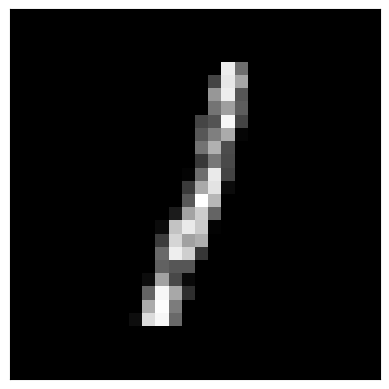

Predicted Label:  [7]
True Label:  7


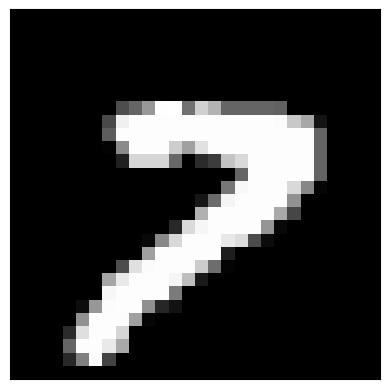

Predicted Label:  [5]
True Label:  5


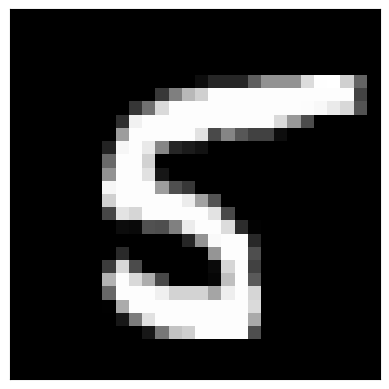

Predicted Label:  [0]
True Label:  0


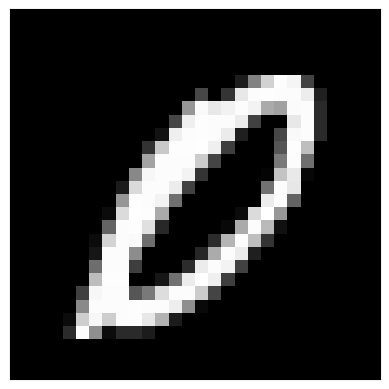

Predicted Label:  [9]
True Label:  9


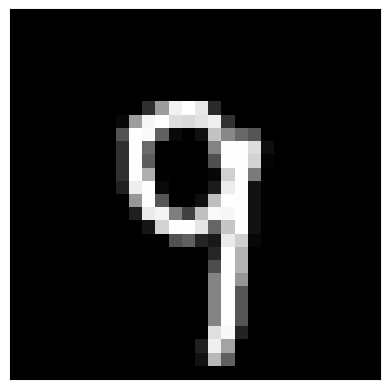

Accuracy in test: 86.18 %


In [29]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


def test_prediction(index, W1, b1, W2, b2):
    current_image = x_test[:, index, None]
    prediction = make_predictions(x_test[:, index, None], W1, b1, W2, b2)
    label = y_test[index]
    print('Predicted Label: ', prediction)
    print('True Label: ', label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


for i in range(5):
    test_prediction(np.random.randint(0, 9999), W1, b1, W2, b2)

predictions = make_predictions(x_test, W1, b1, W2, b2)
print(
    f'Accuracy in test: {get_accuracy(predictions, y_test) * 100:.2f} %')


Congratulations, you have just implemented a neural network using only linear algebra! 🙃

---

Return to the [castle](https://github.com/Nkluge-correa/TeenyTinyCastle).
